In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [71]:
GRD_sheet = pd.read_excel("Datos.xls", sheet_name = "GRD", header = 0, index_col = None)
Hosp_sheet = pd.read_excel("Datos.xls", sheet_name = "Hospitales", header = 0, index_col = None)
Info_sheet = pd.read_excel("Datos.xls", sheet_name = "Información Histórica", header = 0, index_col = None)

In [146]:
# Pregunta 1
# ¿Cuál de las siguientes alternativas corresponde a la estimación de la cantidad de pacientes con GRD9 que
# llegarán el día 425 al Hospital Salvador utilizando un método de media móvil sobre los últimos 5 días 
# (días 420 a 424) redondeado al entero superior?  

hospitalDelSalvadorGRD9=Info_sheet.loc[(Info_sheet["Hospital al que llega"]=="Hospital Del Salvador") & (Info_sheet["GRD"]=="GRD9")]
LlegadasHospitalDelSalvadorGRD9 = hospitalDelSalvadorGRD9[["Día de llegada", "Número de llegada"]].groupby("Día de llegada").count()
LlegadasHospitalDelSalvadorGRD9
mediaMovil = LlegadasHospitalDelSalvadorGRD9.tail(5)
print(mediaMovil)
print(np.round(mediaMovil.mean()[0],0))
print(np.ceil(mediaMovil.mean()[0]))

                Número de llegada
Día de llegada                   
417                             2
418                             1
420                             3
421                             2
422                             4
2.0
3.0


In [73]:
# Pregunta 2
# ¿Cuál de las siguientes alternativas corresponde a la estimación de la cantidad de pacientes que llegarán el día 425
# al Hospital Salvador utilizando un método de media móvil sobre los últimos 5 días (días 420 a 424) redondeado 
# al entero superior?  

hospitalDelSalvador=Info_sheet.loc[Info_sheet["Hospital al que llega"]=="Hospital Del Salvador"]
LlegadasHospitalDelSalvador = hospitalDelSalvador[["Día de llegada", "Número de llegada"]].groupby("Día de llegada").count()
LlegadasHospitalDelSalvador
mediaMovil = LlegadasHospitalDelSalvador.tail(5)
print(mediaMovil)
print(np.round(mediaMovil.mean()[0],1))
print(np.ceil(mediaMovil.mean()[0]))

                Número de llegada
Día de llegada                   
420                            14
421                            12
422                            18
423                             9
424                             6
11.8
12.0


In [74]:
# Pregunta 3
# ¿Cuál de las siguientes alternativas corresponde a la estimación de la cantidad de pacientes que llegarán el día 425
# a la red utilizando un método de media móvil sobre los últimos 5 días (días 420 a 424) redondeado al entero superior?   

LlegadasRed= Info_sheet[["Día de llegada", "Número de llegada"]].groupby("Día de llegada").count()
LlegadasRed
mediaMovil = LlegadasRed.tail(5)
print(mediaMovil)
print(np.round(mediaMovil.mean()[0],1))
print(np.ceil(mediaMovil.mean()[0]))

                Número de llegada
Día de llegada                   
420                           183
421                           159
422                           160
423                           159
424                            82
148.6
149.0


Pendiente: -0.00014078363950514717, Intercepto: 1.6901841445108399


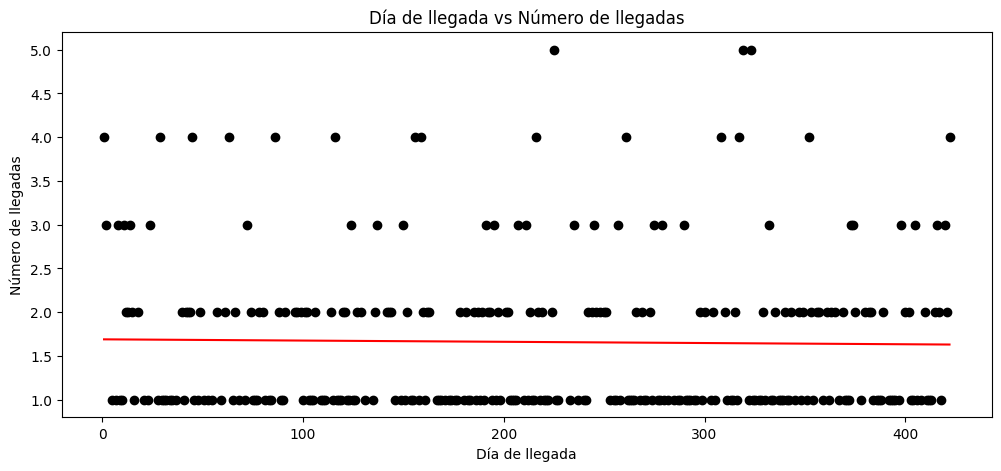

0.00036100959056617477
Llegadas estimadas para el día 425: 2.0
Llegadas estimadas para el día 425: 2.0


,Día de llegada,Número de llegada
0,1,4
1,2,3
2,5,1
3,7,1
4,8,3
...,...,...
289,417,2
290,418,1
291,420,3
292,421,2


In [148]:
# Pregunta 4
# ¿Cuál de las siguientes alternativas corresponde a la estimación de la cantidad de pacientes con GRD9 que llegarán 
# el día 425 al Hospital Salvador utilizando una regresión lineal simple sobre los últimos 5 días (días 420 a 424)
# redondeado al entero superior?  

hospitalDelSalvadorGRD9=Info_sheet.loc[(Info_sheet["Hospital al que llega"]=="Hospital Del Salvador") & (Info_sheet["GRD"]=="GRD9")]
LlegadasHospitalDelSalvadorGRD9 = hospitalDelSalvadorGRD9[["Día de llegada", "Número de llegada"]].groupby("Día de llegada").count()
LlegadasHospitalDelSalvadorGRD9 = LlegadasHospitalDelSalvadorGRD9.reset_index()
#LlegadasHospitalDelSalvadorGRD9 = LlegadasHospitalDelSalvadorGRD9.tail(5)
#LlegadasHospitalDelSalvadorGRD9 = LlegadasHospitalDelSalvadorGRD9.tail(3)

X = LlegadasHospitalDelSalvadorGRD9[["Día de llegada"]]
y = LlegadasHospitalDelSalvadorGRD9[["Número de llegada"]]
regressor = LinearRegression().fit(X, y)
print(f"Pendiente: {regressor.coef_[0][0]}, Intercepto: {regressor.intercept_[0]}")

plt.figure(figsize=(12,5))
plt.scatter(X, y, color = 'black')
plt.plot(X, regressor.predict(X), color = 'red')
plt.title('Día de llegada vs Número de llegadas')
plt.xlabel('Día de llegada')
plt.ylabel('Número de llegadas')
plt.show()

print(regressor.score(X, y))

prox_llegada = 425*regressor.coef_[0][0]+regressor.intercept_[0]
print(f"Llegadas estimadas para el día 425: {np.round(prox_llegada,0)}")
print(f"Llegadas estimadas para el día 425: {np.ceil(prox_llegada)}")

LlegadasHospitalDelSalvadorGRD9


Pendiente: -1.9000000000000001, Intercepto: 813.6


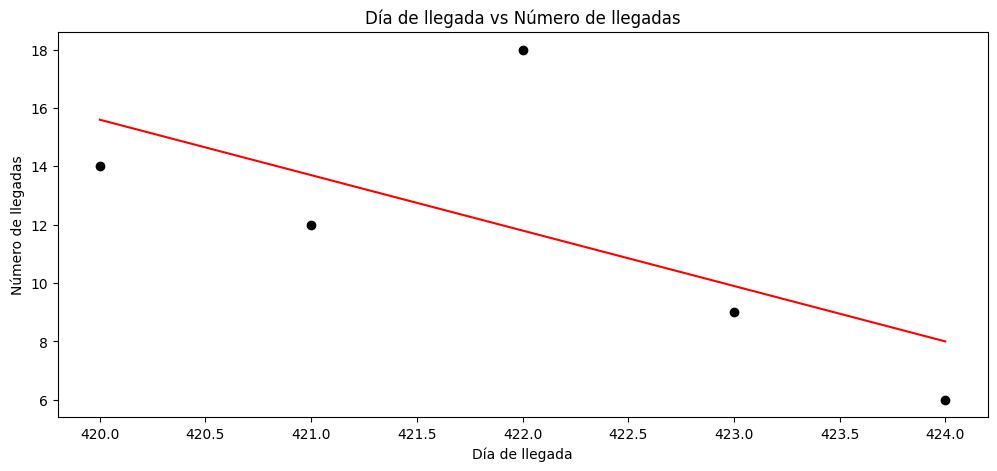

0.42570754716980697
Llegadas estimadas para el día 425: 6.0


,Día de llegada,Número de llegada
419,420,14
420,421,12
421,422,18
422,423,9
423,424,6


In [76]:
# Pregunta 5
# ¿Cuál de las siguientes alternativas corresponde a la estimación de la cantidad de pacientes que llegarán el día 425 
# al Hospital Salvador utilizando una regresión lineal simple sobre los últimos 5 días (días 420 a 424) redondeado 
# al entero superior?  

hospitalDelSalvador=Info_sheet.loc[Info_sheet["Hospital al que llega"]=="Hospital Del Salvador"]
LlegadasHospitalDelSalvador = hospitalDelSalvador[["Día de llegada", "Número de llegada"]].groupby("Día de llegada").count()
LlegadasHospitalDelSalvador = LlegadasHospitalDelSalvador.reset_index()
LlegadasHospitalDelSalvador = LlegadasHospitalDelSalvador.tail(5)

X = LlegadasHospitalDelSalvador[["Día de llegada"]]
y = LlegadasHospitalDelSalvador[["Número de llegada"]]
regressor = LinearRegression().fit(X, y)
print(f"Pendiente: {regressor.coef_[0][0]}, Intercepto: {regressor.intercept_[0]}")

plt.figure(figsize=(12,5))
plt.scatter(X, y, color = 'black')
plt.plot(X, regressor.predict(X), color = 'red')
plt.title('Día de llegada vs Número de llegadas')
plt.xlabel('Día de llegada')
plt.ylabel('Número de llegadas')
plt.show()

print(regressor.score(X, y))

prox_llegada = 425*regressor.coef_[0][0]+regressor.intercept_[0]
print(f"Llegadas estimadas para el día 425: {np.round(prox_llegada,0)}")

LlegadasHospitalDelSalvador



Pendiente: -20.200000000000003, Intercepto: 8673.000000000002


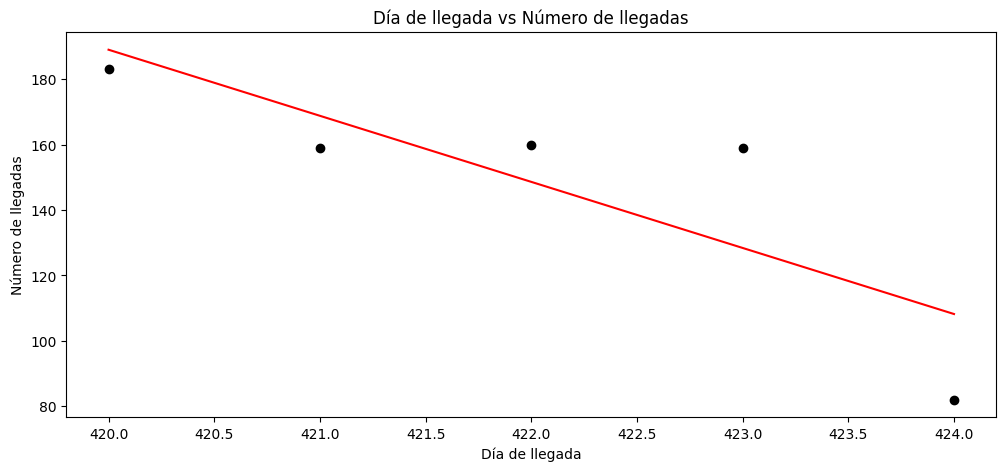

0.6840340642392606
Llegadas estimadas para el día 425: 88.0


,Día de llegada,Número de llegada
419,420,183
420,421,159
421,422,160
422,423,159
423,424,82


In [92]:
# Pregunta 6
# ¿Cuál de las siguientes alternativas corresponde a la estimación de la cantidad de pacientes que llegarán a la red 
# el día 425 utilizando una regresión lineal simple sobre los últimos 5 días (días 420 a 424) redondeado al entero 
# superior? 

LlegadasRed = Info_sheet[["Día de llegada", "Número de llegada"]].groupby("Día de llegada").count()
LlegadasRed=LlegadasRed.reset_index()
LlegadasRed = LlegadasRed.tail(5)

X = LlegadasRed[["Día de llegada"]]
y = LlegadasRed[["Número de llegada"]]
regressor = LinearRegression().fit(X, y)
print(f"Pendiente: {regressor.coef_[0][0]}, Intercepto: {regressor.intercept_[0]}")

plt.figure(figsize=(12,5))
plt.scatter(X, y, color = 'black')
plt.plot(X, regressor.predict(X), color = 'red')
plt.title('Día de llegada vs Número de llegadas')
plt.xlabel('Día de llegada')
plt.ylabel('Número de llegadas')
plt.show()

print(regressor.score(X, y))

prox_llegada = 425*regressor.coef_[0][0]+regressor.intercept_[0]
print(f"Llegadas estimadas para el día 425: {np.round(prox_llegada,0)}")

LlegadasRed


In [93]:
# Pregunta 7
# ¿Cuál de las siguientes alternativas corresponde al valor del coeficiente R2 de una estimación de la cantidad 
# de pacientes que llegarán a la red el día 425 utilizando una regresión lineal simple sobre los últimos 5 días
# (días 420 a 424) redondeado al entero superior?  

# idem pregunta 6
print(regressor.score(X, y))

0.6840340642392606


In [109]:
# Pregunta 8
# Usted realizó una estimación sobre el total de pacientes que llegarán a la red los días 420 a 424, siendo esta 
# predicción: 156, 123, 178, 200 y 155, para los días 420 a 424 respectivamente. ¿Cuál de las siguientes alternativas
# corresponde al error total de esta estimación? 

Llegadas_GRD = Info_sheet[["Día de llegada", "Número de llegada"]].groupby("Día de llegada").count()
Llegadas_GRD = Llegadas_GRD.reset_index()
Llegadas_GRD = Llegadas_GRD.tail(5)
pregunta8=Llegadas_GRD
pregunta8 = pregunta8.rename(columns={"Día de llegada": "Día", "Número de llegada": "Llegadas"})
pregunta8['Estimación']=[156, 123, 178, 200 , 155]
pregunta8["ErrorEstimación"] = pregunta8.apply(lambda row: row.Llegadas-row.Estimación, axis = 1)
pregunta8

,Día,Llegadas,Estimación,ErrorEstimación
419,420,183,156,27
420,421,159,123,36
421,422,160,178,-18
422,423,159,200,-41
423,424,82,155,-73


In [151]:
print("Error método estimación:", np.round(pregunta8["ErrorEstimación"].sum(),0))

Error método estimación: -69


Pendiente: -0.21428571428571422, Intercepto: 101.21428571428568


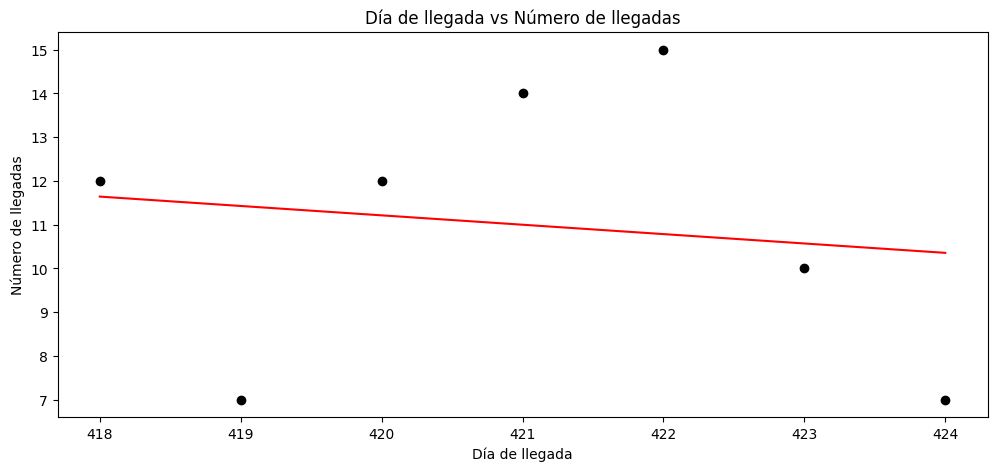

0.021428571428573018
Llegadas estimadas para el día 422: 11.0
Llegadas estimadas para el día 423: 11.0
Llegadas estimadas para el día 424: 10.0


,Día de llegada,Número de llegada
417,418,12
418,419,7
419,420,12
420,421,14
421,422,15
422,423,10
423,424,7


In [118]:
# Pregunta 9
# Los valores del intercepto y la pendiente de un modelo de regresión lineal para predecir la cantidad de pacientes
# que llegarán un día cualquiera al Hospital San José son 60 y 10 respectivamente. La variable independiente de esta
# regresión corresponde a las llegadas de hace 7 días. 
# ¿Cuál de las siguientes alternativas corresponde a la estimación de esta regresión para los días 422, 423 y 424?

hospitalSanJose=Info_sheet.loc[Info_sheet["Hospital al que llega"]=="Complejo Hospitalario San José"]
LlegadasHospitalSanJose= hospitalSanJose[["Día de llegada", "Número de llegada"]].groupby("Día de llegada").count()
LlegadasHospitalSanJose= LlegadasHospitalSanJose.reset_index()
LlegadasHospitalSanJose= LlegadasHospitalSanJose.tail(7)

X = LlegadasHospitalSanJose[["Día de llegada"]]
y = LlegadasHospitalSanJose[["Número de llegada"]]
regressor = LinearRegression().fit(X, y)
print(f"Pendiente: {regressor.coef_[0][0]}, Intercepto: {regressor.intercept_[0]}")

plt.figure(figsize=(12,5))
plt.scatter(X, y, color = 'black')
plt.plot(X, regressor.predict(X), color = 'red')
plt.title('Día de llegada vs Número de llegadas')
plt.xlabel('Día de llegada')
plt.ylabel('Número de llegadas')
plt.show()

print(regressor.score(X, y))

prox_llegada = 422*regressor.coef_[0][0]+regressor.intercept_[0]
print(f"Llegadas estimadas para el día 422: {np.round(prox_llegada,0)}")
prox_llegada = 423*regressor.coef_[0][0]+regressor.intercept_[0]
print(f"Llegadas estimadas para el día 423: {np.round(prox_llegada,0)}")
prox_llegada = 424*regressor.coef_[0][0]+regressor.intercept_[0]
print(f"Llegadas estimadas para el día 424: {np.round(prox_llegada,0)}")

LlegadasHospitalSanJose

In [129]:
# Pregunta 10
# ¿Cuál de las siguientes alternativas corresponde al código que ocupa el comando “for” para contar todas las
# camas disponibles actualmente en la red de salud?  

i = 0
for elemento in Hosp_sheet["Nombre Establecimiento"]:
    apoyo10 = Hosp_sheet.loc[Hosp_sheet["Nombre Establecimiento"] == elemento]
    camas = apoyo10["Total Camas Críticas"]
    #print (camas)
    print(f" Camas disponibles en el Establecimiento {elemento} son {camas[i]}")
    i += 1 
   

 Camas disponibles en el Establecimiento Complejo Hospitalario San José son 44
 Camas disponibles en el Establecimiento Hospital Adalberto Steeger (Talagante) son 17
 Camas disponibles en el Establecimiento Hospital Dr. Félix Bulnes Cerda son 9
 Camas disponibles en el Establecimiento Hospital San Juan de Dios son 76
 Camas disponibles en el Establecimiento Instituto Traumatológico Dr. Teodoro Gebauer son 18
 Camas disponibles en el Establecimiento Hospital Clínico San Borja-Arriarán son 43
 Camas disponibles en el Establecimiento Hospital de Urgencia Asistencia Pública Dr. Alejandro del Río son 44
 Camas disponibles en el Establecimiento Hospital el Carmen son 18
 Camas disponibles en el Establecimiento Hospital Del Salvador son 46
 Camas disponibles en el Establecimiento Hospital Dr. Luis Tisné B. son 24
 Camas disponibles en el Establecimiento Instituto de Neurocirugía Dr. Alfonso Asenjo son 23
 Camas disponibles en el Establecimiento Instituto Nacional de Enfermedades Respiratorias